Vi vil se om der er en sammenhæng mellem skyldige personer og deres køn samt socioøkoknomisk status i tidsperioden 2015 til 2023. Vi har vi taget udgangspunkt i de datasæt fra Danmarks statistik som har relevant information til vores opgave. 

In [1]:
# For data storage and manipulation
import pandas as pd
# for numeric computations
import numpy as np

In [2]:
# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# for ML methods and algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

In [4]:
# for serialization and deserialization of data from and to a file
import pickle

In [ ]:
# read the data
file_paths = [
    "Skyldige personer efter køn, alder, socioøkoknomisk status og tid(2015-2023).xlsx",
    "Skyldige personer efter socioøkonomisk status, overtrædelsens art og tid(2015-2023).xlsx",
    "Skyldige personer i alderen 15-79 år efter køn, alder og oprindelsesland.xlsx",
    "Skyldige personer i alderen 15-79 år efter køn, alder, uddannelse og tid(2015-2023).xlsx"
]

dfs = []
years = [str(y) for y in range(2015, 2024)]

for file in file_paths:
    print(f"🔹 Loading: {file}")
    df = pd.read_excel(file, header=2)
    
    # Forward-fill any unnamed/descriptive columns
    unnamed_cols = [c for c in df.columns if "Unnamed" in str(c)]
    for col in unnamed_cols:
        df[col] = df[col].ffill()
    
    # Only rename columns that are truly unnamed
    rename_map = {}
    category_counter = 1
    for col in df.columns:
        if "Unnamed" in str(col):
            rename_map[col] = f"Category{category_counter}"
            category_counter += 1
    
    df.rename(columns=rename_map, inplace=True)
    
    # Keep only relevant columns: all text columns + year columns that exist
    text_cols = [c for c in df.columns if c not in years]
    keep_cols = text_cols + [y for y in years if y in df.columns]
    df = df[keep_cols]
    
    # Add source file column
    df["SourceFile"] = file.split("(")[0].strip()
    
    dfs.append(df)

# Merge all dataframes
df_all = pd.concat(dfs, ignore_index=True)


print(f"✅ Combined dataset shape: {df_all.shape}")
df_all.head()

In [ ]:
year_cols = [str(y) for y in range(2015, 2024) if str(y) in df_all.columns]
df_all[year_cols] = df_all[year_cols].apply(lambda c: c.fillna(c.mean()))
df_all = df_all.drop_duplicates()
df_all.info()
print(df.columns.tolist())

In [ ]:
# Example: Total across all files per year
totals = df_all[year_cols].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=year_cols, y=totals)
plt.title("Samlet kriminalitet 2015–2023 (alle kilder)")
plt.ylabel("Antal personer")
plt.xlabel("År")
plt.grid(True)
plt.show()

In [ ]:
df_all.to_csv("clean_crime_data.csv", index=False)
print("💾 Saved unified dataset as data/clean_crime_data.csv")

In [5]:
# read the data
df1 = pd.read_excel("Skyldige personer efter køn, alder, socioøkoknomisk status og tid(2015-2023).xlsx", header=2)
df2 = pd.read_excel("Skyldige personer efter socioøkonomisk status, overtrædelsens art og tid(2015-2023).xlsx", header=2)
df3 = pd.read_excel("Skyldige personer i alderen 15-79 år efter køn, alder og oprindelsesland.xlsx", header=2)
df4 = pd.read_excel("Skyldige personer i alderen 15-79 år efter køn, alder, uddannelse og tid(2015-2023).xlsx", header=2)

In [6]:
print(df1.head())

  Unnamed: 0   Unnamed: 1    Unnamed: 2      2015      2016      2017  \
0       Mænd  Alder i alt         I alt  121223.0  118869.0  112555.0   
1        NaN          NaN  Selvstændige    8018.0    8906.0    7757.0   
2        NaN          NaN  Lønmodtagere   62490.0   61367.0   58314.0   
3        NaN          NaN   Arbejdsløse    2756.0    2474.0    1970.0   
4        NaN          NaN    Studerende   15179.0   15039.0   14581.0   

       2018      2019      2020      2021      2022      2023  
0  112883.0  123128.0  135465.0  128597.0  124120.0  122128.0  
1    7237.0    7886.0    9429.0    8799.0    8324.0    7809.0  
2   57347.0   64339.0   75069.0   70396.0   68780.0   69552.0  
3    2086.0    2041.0    2136.0    3783.0    2541.0    1274.0  
4   15088.0   16272.0   15149.0   14911.0   14974.0   13815.0  


In [7]:
# list over rows and colums
[df1.shape, df2.shape, df3.shape, df4.shape]

[(66, 12), (754, 11), (602, 25), (50, 12)]

In [8]:
# see which are the attribute labels
[list(df1),list(df2),list(df3),list(df4)]

[['Unnamed: 0',
  'Unnamed: 1',
  'Unnamed: 2',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023'],
 ['Unnamed: 0',
  'Unnamed: 1',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023'],
 ['Unnamed: 0',
  'Unnamed: 1',
  'Unnamed: 2',
  '2000',
  '2002',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023'],
 ['Unnamed: 0',
  'Unnamed: 1',
  'Unnamed: 2',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023']]

In [9]:
# get idea of the look
[df1.sample(5),df2.sample(5),df3.sample(5),df4.sample(5)]

[   Unnamed: 0 Unnamed: 1       Unnamed: 2     2015     2016     2017     2018  \
 14        NaN        NaN  Øvrige personer   9455.0   9515.0   9290.0   9892.0   
 17        NaN        NaN     Selvstændige   3889.0   4173.0   3498.0   3169.0   
 9         NaN        NaN     Selvstændige    691.0    793.0    721.0    813.0   
 22        NaN        NaN  Øvrige personer   8762.0   8236.0   8146.0   8571.0   
 10        NaN        NaN     Lønmodtagere  16076.0  15684.0  16267.0  16986.0   
 
        2019     2020     2021     2022     2023  
 14   9632.0   9467.0   7859.0   7025.0   7119.0  
 17   3518.0   4174.0   3812.0   3540.0   3260.0  
 9     833.0   1055.0   1045.0   1009.0    890.0  
 22   9057.0   9486.0   8844.0   8588.0   8654.0  
 10  19097.0  20921.0  19340.0  19357.0  19829.0  ,
     Unnamed: 0                                         Unnamed: 1   2015  \
 394        NaN           Vold og lignende mod offentlig myndighed  199.0   
 664        NaN  Seksualforbrydelse mod barn 

In [10]:
# get idea of columns and types
[df1.info(),df2.info(),df3.info(),df4.info()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3 non-null      object 
 1   Unnamed: 1  8 non-null      object 
 2   Unnamed: 2  64 non-null     object 
 3   2015        64 non-null     float64
 4   2016        64 non-null     float64
 5   2017        64 non-null     float64
 6   2018        64 non-null     float64
 7   2019        64 non-null     float64
 8   2020        64 non-null     float64
 9   2021        64 non-null     float64
 10  2022        64 non-null     float64
 11  2023        64 non-null     float64
dtypes: float64(9), object(3)
memory usage: 6.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      object 
 1   Unnamed: 1  752 non-null    object 
 2

[None, None, None, None]

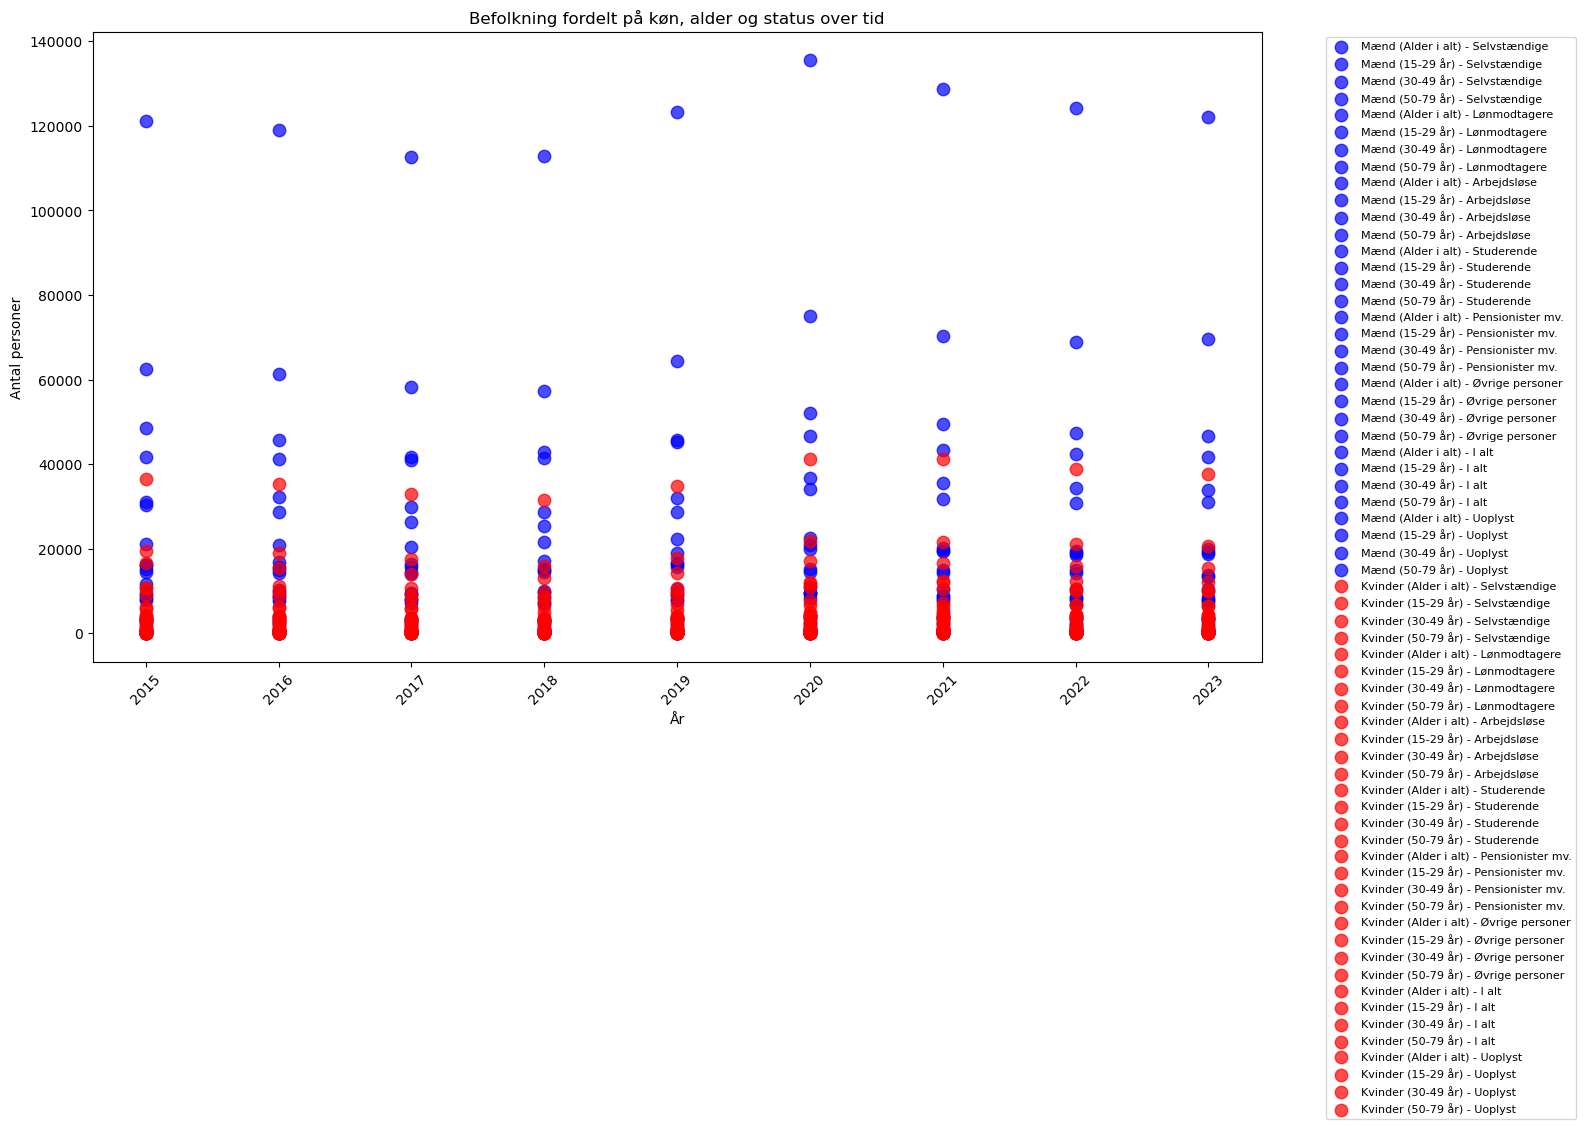

In [11]:
# Scatterplot for "Skyldige personer efter køn, alder, socioøkoknomisk status og tid(2015-2023)
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Fyld NaN forward
df1['Unnamed: 0'] = df1['Unnamed: 0'].ffill()
df1['Unnamed: 1'] = df1['Unnamed: 1'].ffill()

# Colors for gender
gender_farver = {'Mænd': 'blue', 'Kvinder': 'red'}

plt.figure(figsize=(16,10))

# Loop over gender
for gender, farve in gender_farver.items():
    df_gender = df1[df1['Unnamed: 0'] == gender]
    
    # Loop over status
    for status in ['Selvstændige', 'Lønmodtagere', 'Arbejdsløse', 
                   'Studerende', 'Pensionister mv.', 'Øvrige personer', 'I alt', 'Uoplyst']:
        df_status = df_gender[df_gender['Unnamed: 2'] == status]
        if not df_status.empty:
            for idx, row in df_status.iterrows():
                alder = row['Unnamed: 1']
                values = row[years].values.flatten()
                plt.scatter(
                    years, values,
                    color=farve,
                    marker='o',  # alle statuser som cirkler
                    s=80,
                    alpha=0.7,
                    label=f'{gender} ({alder}) - {status}'
                )

plt.xlabel("År")
plt.ylabel("Antal personer")
plt.title("Befolkning fordelt på køn, alder og status over tid")
plt.xticks(rotation=45)

# Remove duplicates in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

Grafen viser et samlet overblik over fordelingen af mænd og kvinder. Alder og status er lagt sammen så grafen kun tager henblik på en samlet overblik over kønsfordelingen af mænd og kvinder på de givende år. Her ses det tydligt hvordan der er langt flere mænd end kvinder uanset hvilket år som er blevet dømt for kriminalitet i Danmark.

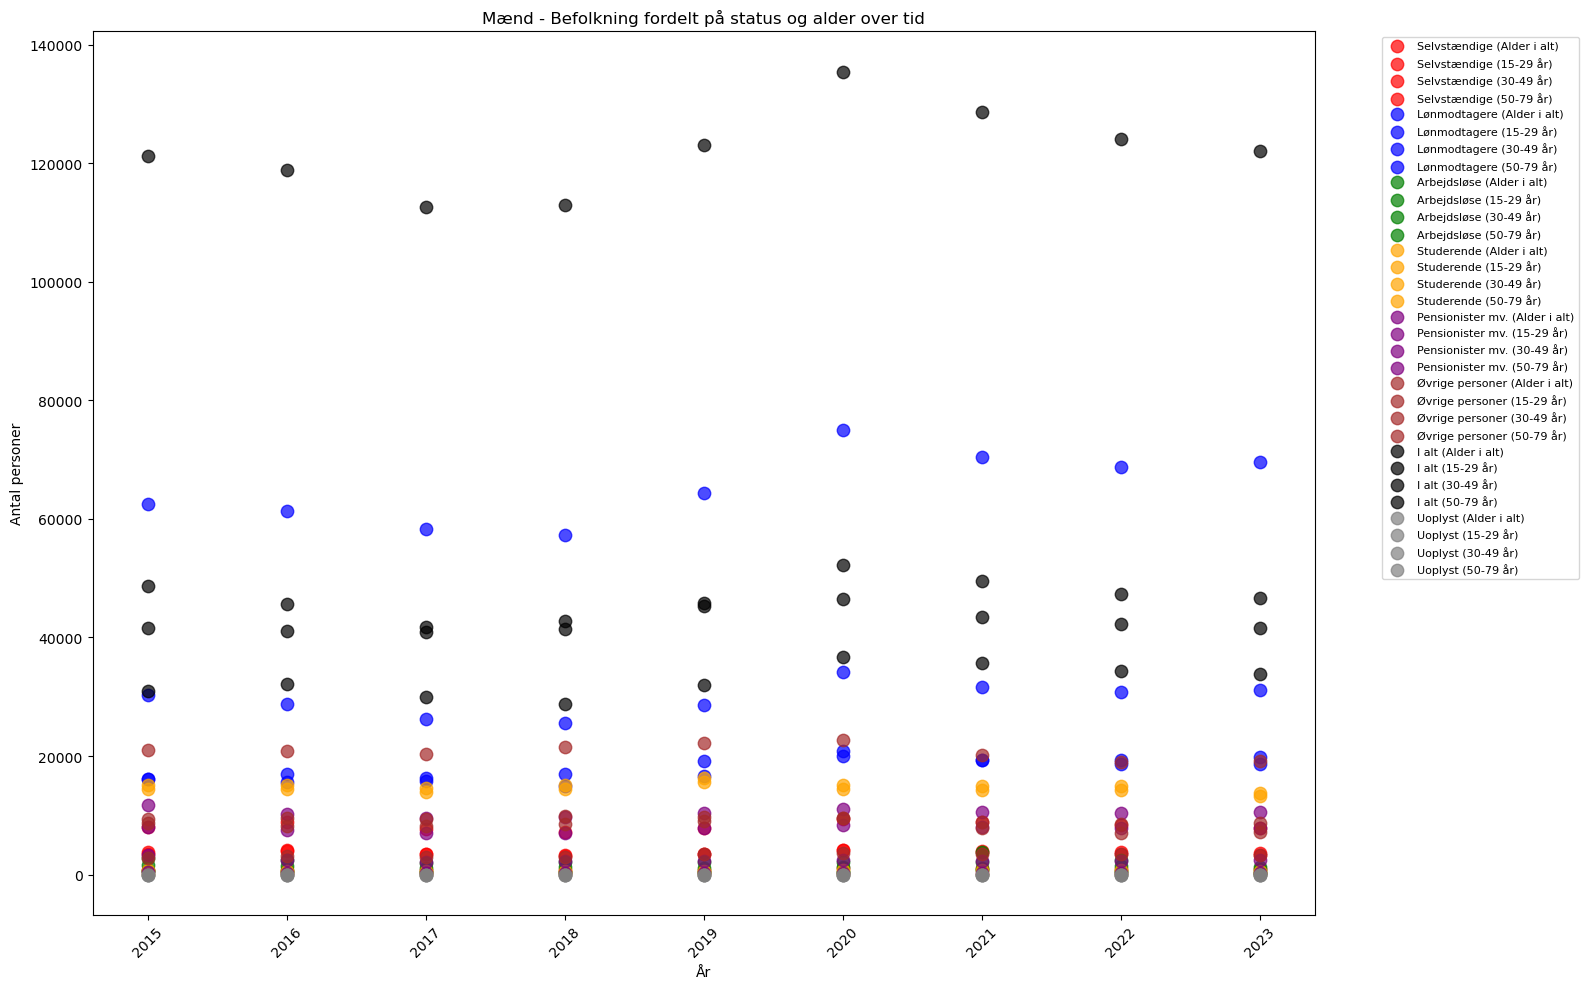

In [12]:
# Scatterplot for the different status for all men
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Fyld NaN forward
df1['Unnamed: 0'] = df1['Unnamed: 0'].ffill()
df1['Unnamed: 1'] = df1['Unnamed: 1'].ffill()

# Colors for status
status_farver = {
    'Selvstændige': 'red', 
    'Lønmodtagere': 'blue', 
    'Arbejdsløse': 'green', 
    'Studerende': 'orange', 
    'Pensionister mv.': 'purple', 
    'Øvrige personer': 'brown',
    'I alt': 'black',
    'Uoplyst': 'gray'
}

plt.figure(figsize=(16,10))

# Filter men only
df_mænd = df1[df1['Unnamed: 0'] == 'Mænd']

# Loop over status
for status, farve in status_farver.items():
    df_status = df_mænd[df_mænd['Unnamed: 2'] == status]
    if not df_status.empty:
        for idx, row in df_status.iterrows():
            alder = row['Unnamed: 1']
            values = row[years].values.flatten()
            plt.scatter(
                years, values,
                color=farve,
                s=80,
                alpha=0.7,
                label=f'{status} ({alder})'
            )

plt.xlabel("År")
plt.ylabel("Antal personer")
plt.title("Mænd - Befolkning fordelt på status og alder over tid")
plt.xticks(rotation=45)

# Remove duplicates in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

Grafen har taget udgangspunkt i dataen omhandlende mænd, her ses det hvordan at lønmodtagerene er den største del af de dømte mænd i Danmark kontra arbejdsløse og selvstændige som ligger lavest.

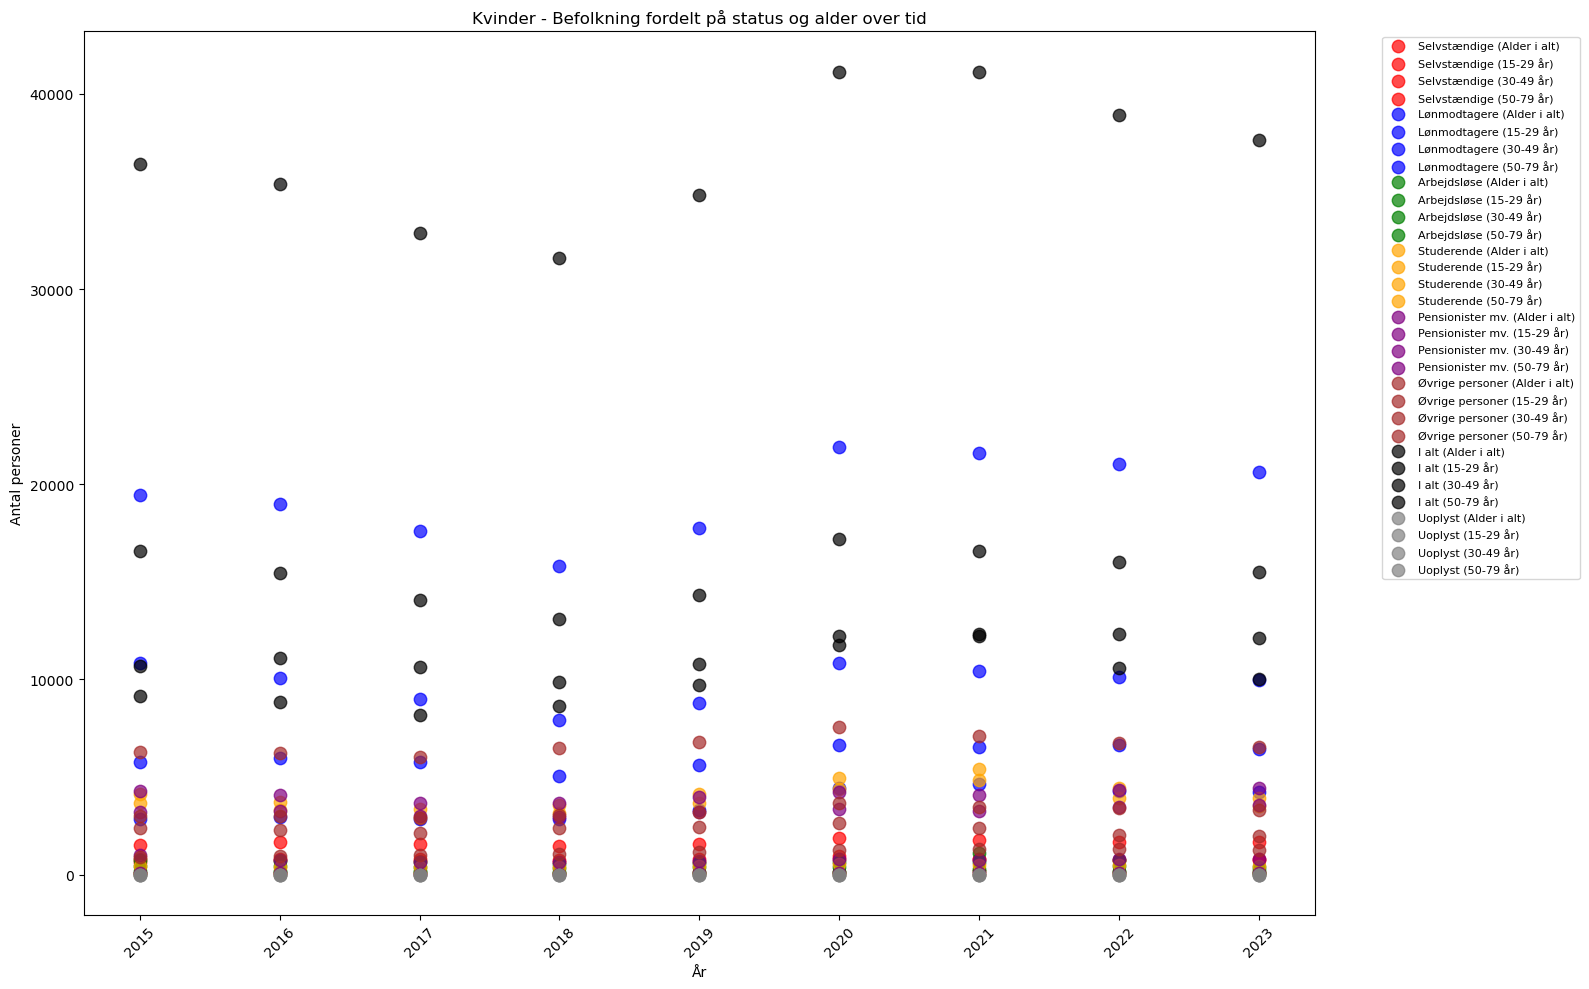

In [13]:
# Scatterplot for the different status for all women
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Fyld NaN forward
df1['Unnamed: 0'] = df1['Unnamed: 0'].ffill()
df1['Unnamed: 1'] = df1['Unnamed: 1'].ffill()

# Colors for status
status_farver = {
    'Selvstændige': 'red', 
    'Lønmodtagere': 'blue', 
    'Arbejdsløse': 'green', 
    'Studerende': 'orange', 
    'Pensionister mv.': 'purple', 
    'Øvrige personer': 'brown',
    'I alt': 'black',
    'Uoplyst': 'gray'
}

plt.figure(figsize=(16,10))

# Filter only women
df_kvinder = df1[df1['Unnamed: 0'] == 'Kvinder']

# Loop over status
for status, farve in status_farver.items():
    df_status = df_kvinder[df_kvinder['Unnamed: 2'] == status]
    if not df_status.empty:
        for idx, row in df_status.iterrows():
            alder = row['Unnamed: 1']
            values = row[years].values.flatten()
            plt.scatter(
                years, values,
                color=farve,
                s=80,
                alpha=0.7,
                label=f'{status} ({alder})'
            )

plt.xlabel("År")
plt.ylabel("Antal personer")
plt.title("Kvinder - Befolkning fordelt på status og alder over tid")
plt.xticks(rotation=45)

# Remove duplicates in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

Grafen som den forrige viser sammen sammenhæng blot over kvinderne. Igen her er der flest lønmodtager som bliver dømt for kriminalitet i Danmark.

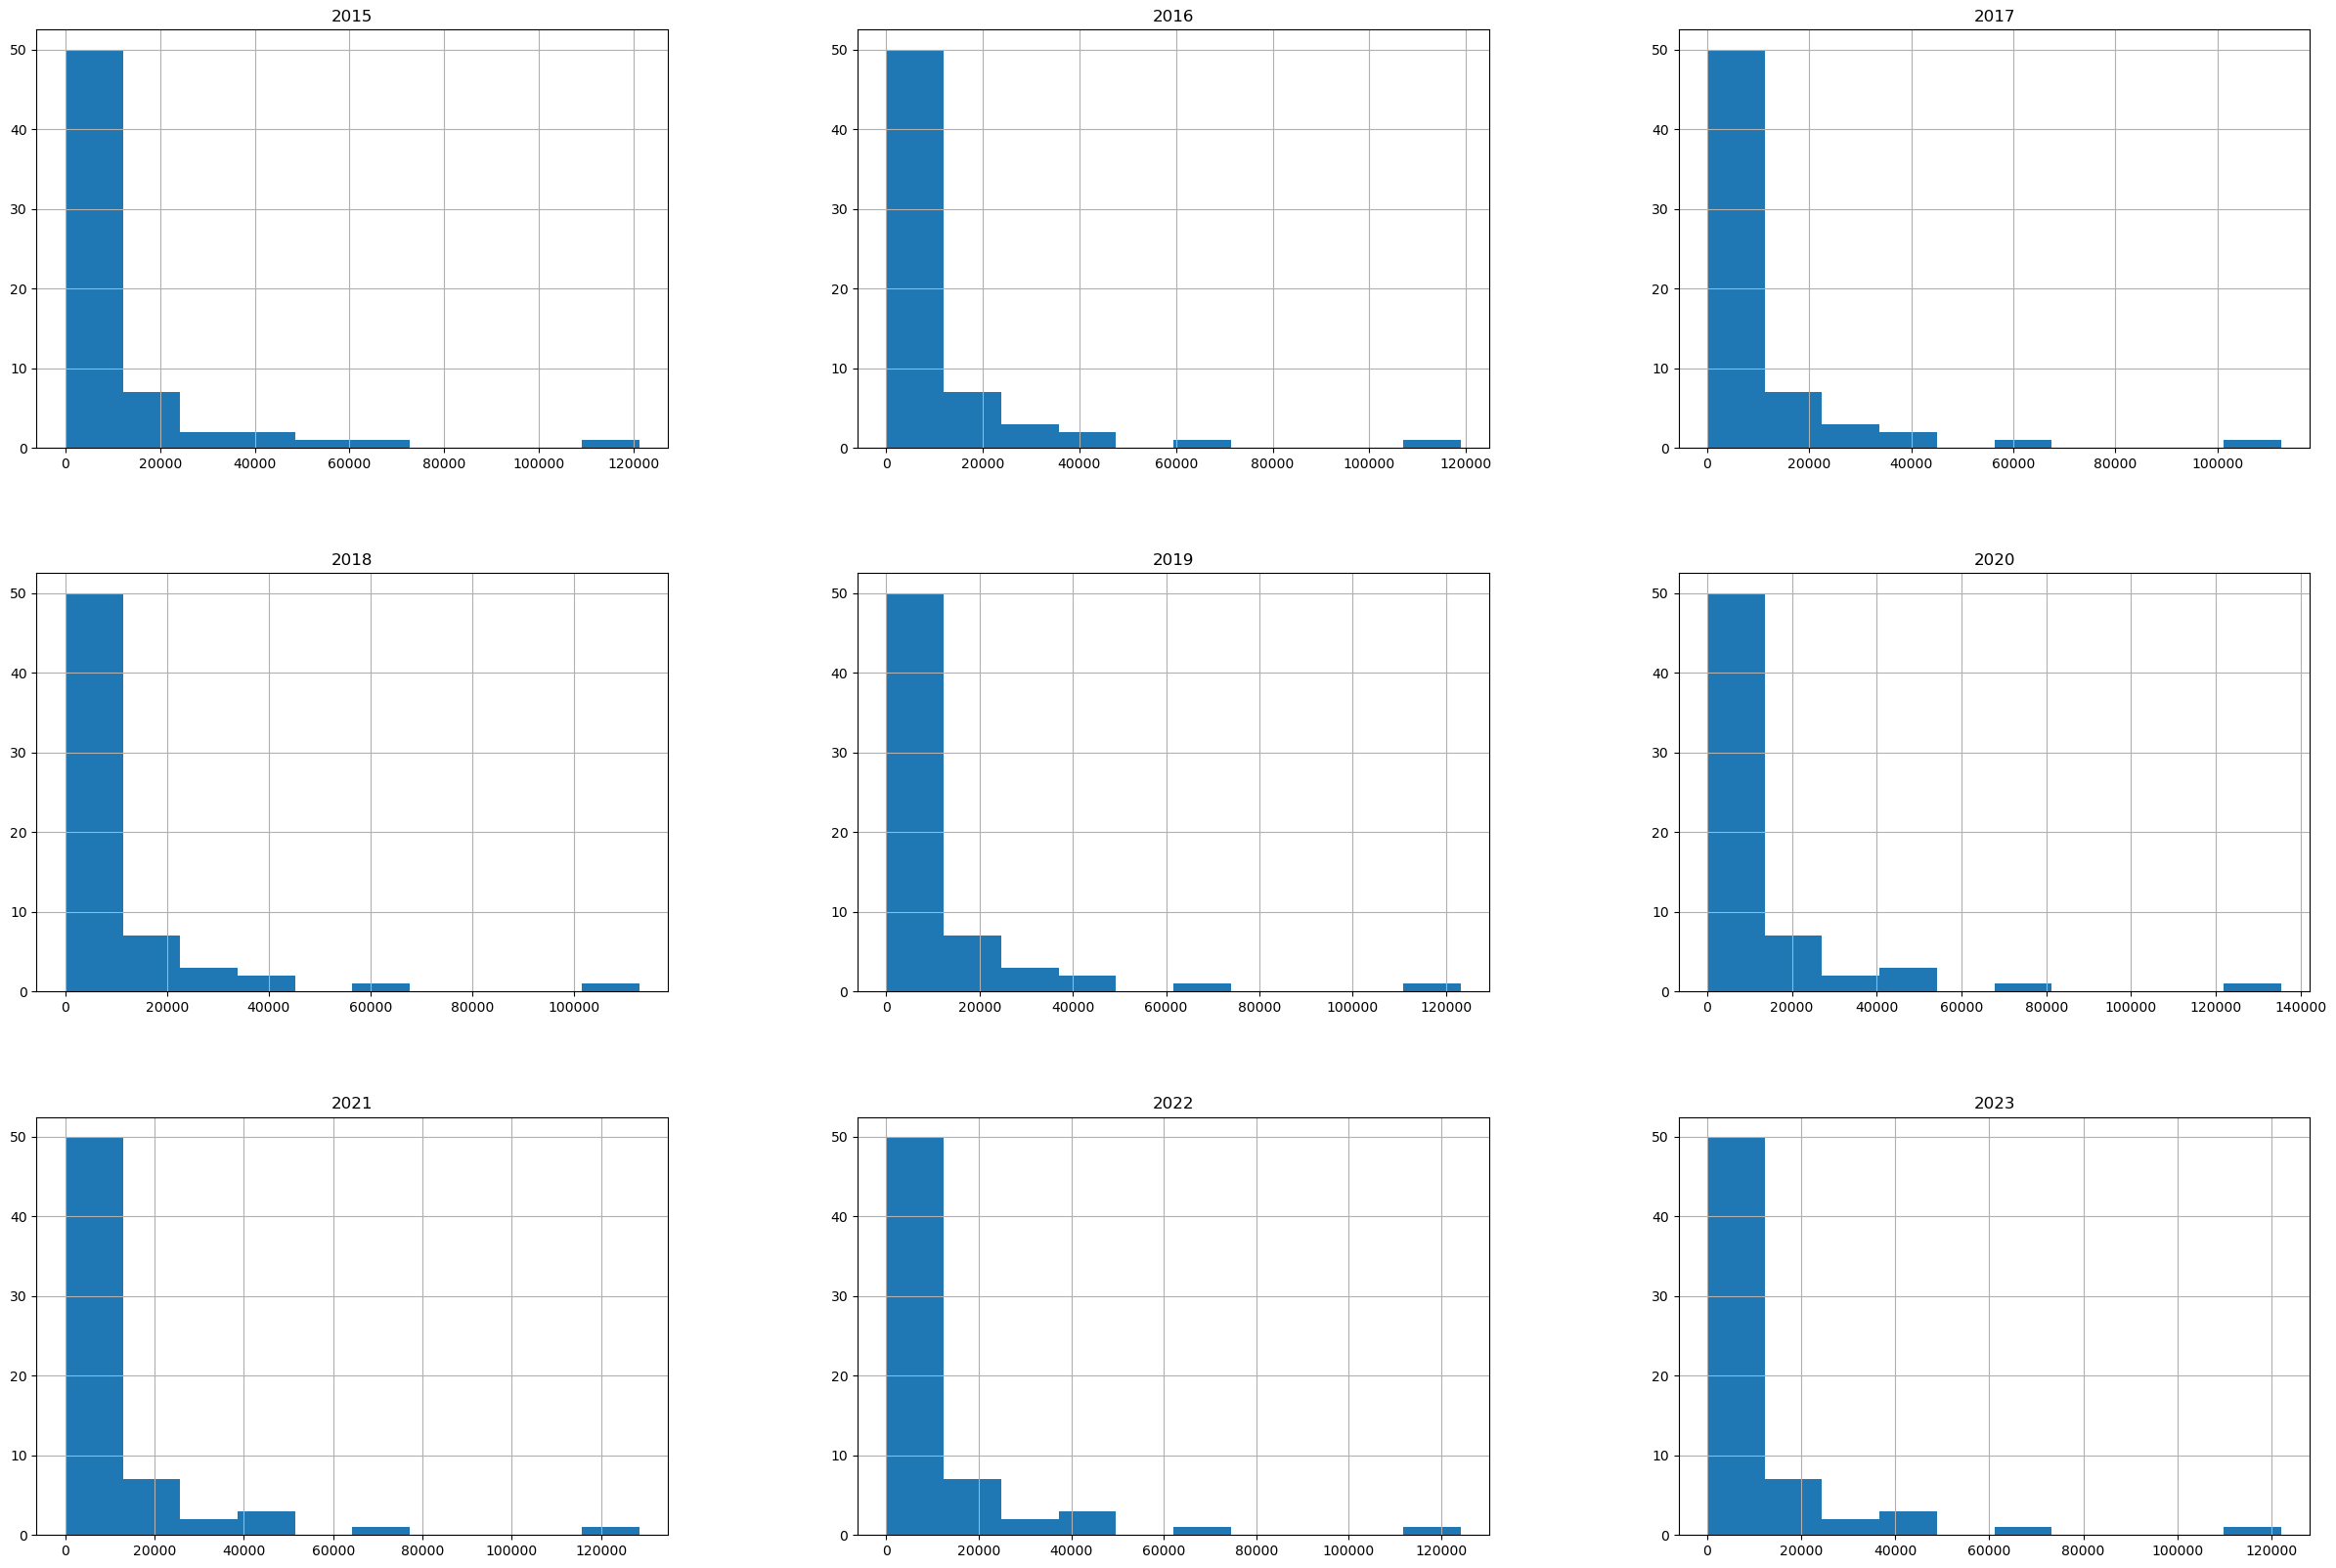

In [14]:
# histograms
hist = df1.hist(figsize=(30,20))

Hvert histogram viser fordelingen af antal personer for ét specifikt år på tværs af alle køn, aldersgrupper og socioøkonomiske statusser. 

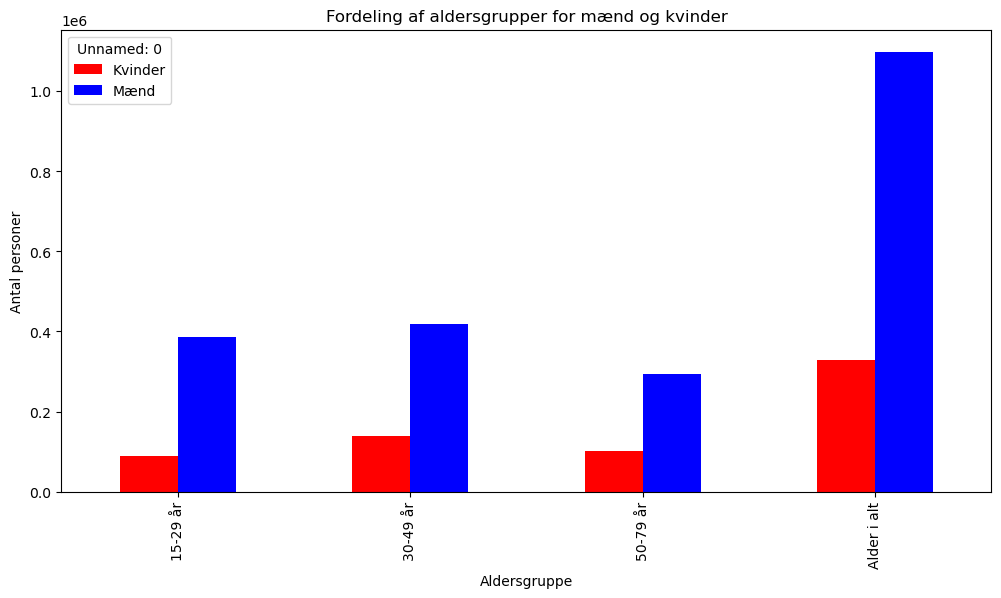

In [15]:
# distribution of age and gender
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Filter genders
df_plot = df1[df1['Unnamed: 0'].isin(['Mænd','Kvinder'])]
df_plot = df_plot[df_plot['Unnamed: 1'].notna()]
df_plot = df_plot[df_plot['Unnamed: 2'] != 'I alt']  # fjern 'I alt', hvis ønsket

# Total number of people per gender and age group (over all years)
df_plot['Total'] = df_plot[years].sum(axis=1)

# Pivot to get gender as columns
df_pivot = df_plot.pivot_table(index='Unnamed: 1', columns='Unnamed: 0', values='Total', aggfunc='sum')

# Create stacked bar plot
df_pivot.plot(kind='bar', figsize=(12,6), color=['red','blue'])

plt.xlabel("Aldersgruppe")
plt.ylabel("Antal personer")
plt.title("Fordeling af aldersgrupper for mænd og kvinder")
plt.show()

Her ses kønsfordelingen for mænd og kvinder i de forskellige aldersgrupper, tydligt fremstår det hvordan at der er langt større antal dømte mænd end kvinder, og gældende for begge køn er der flere i aldersgruppen 30-49 år.

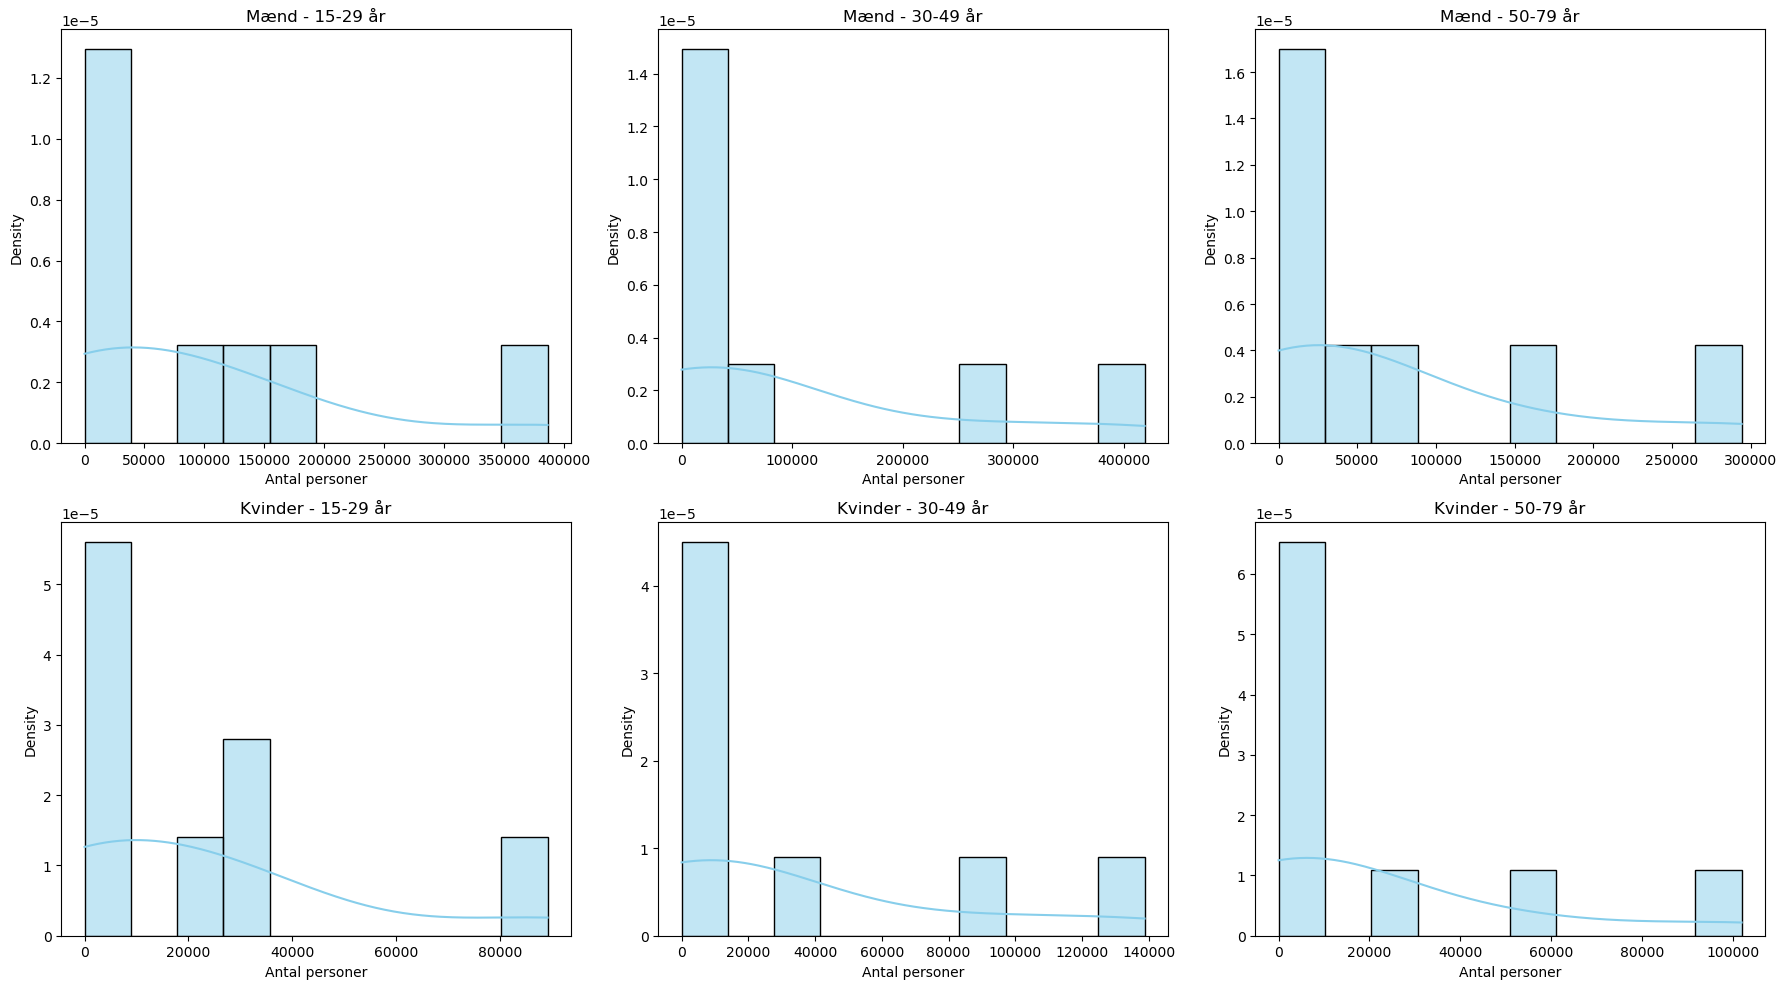

In [16]:
# distribution of age and gender
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Filtrer kun relevante køn og aldersgrupper
df_plot = df1[df1['Unnamed: 0'].isin(['Mænd','Kvinder'])]
df_plot = df_plot[df_plot['Unnamed: 1'].isin(['15-29 år','30-49 år','50-79 år'])]

# Summer alle år for hver række
df_plot['Total'] = df_plot[years].sum(axis=1)

# Sæt aldersgrupper
age_groups = ['15-29 år','30-49 år','50-79 år']
genders = ['Mænd','Kvinder']

fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()  # Gør det nemt at iterere

for i, gender in enumerate(genders):
    for j, age in enumerate(age_groups):
        ax = axes[i*3 + j]
        # Filtrer for denne kombination af køn og aldersgruppe
        df_subset = df_plot[(df_plot['Unnamed: 0']==gender) & (df_plot['Unnamed: 1']==age)]
        # Tag kun Total
        values = df_subset['Total']
        # Histogram med KDE
        sns.histplot(values, kde=True, stat="density", bins=10, color='skyblue', ax=ax)
        ax.set_title(f'{gender} - {age}')
        ax.set_xlabel('Antal personer')
        ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

Hver graf viser en skæv fordeling (højre-skæv), fordi nogle statusser (fx Lønmodtagere) har meget høje værdier, mens andre (fx Selvstændige eller Uoplyst) er meget små. Hver graf viser fordelingen af, hvor mange personer der samlet set i perioden tilhører de forskellige socioøkonomiske grupper i den aldersgruppe.

In [18]:
# to check null values in data
[df1.isnull().sum(),df2.isnull().sum(),df3.isnull().sum(),df4.isnull().sum()]

[Unnamed: 0    0
 Unnamed: 1    0
 Unnamed: 2    2
 2015          2
 2016          2
 2017          2
 2018          2
 2019          2
 2020          2
 2021          2
 2022          2
 2023          2
 dtype: int64,
 Unnamed: 0    745
 Unnamed: 1      2
 2015            2
 2016            2
 2017            2
 2018            2
 2019            2
 2020            2
 2021            2
 2022            2
 2023            2
 dtype: int64,
 Unnamed: 0    599
 Unnamed: 1    594
 Unnamed: 2      2
 2000            2
 2002            2
 2004            2
 2005            2
 2006            2
 2007            2
 2008            2
 2009            2
 2010            2
 2011            2
 2012            2
 2013            2
 2014            2
 2015            2
 2016            2
 2017            2
 2018            2
 2019            2
 2020            2
 2021            2
 2022            2
 2023            2
 dtype: int64,
 Unnamed: 0    47
 Unnamed: 1    42
 Unnamed: 2     2
 2015        

In [19]:
# get idea of basic statistical parameters for each column
[df1.describe(),df2.describe(),df3.describe(),df4.describe()]

[              2015           2016           2017           2018  \
 count      64.0000      64.000000      64.000000      64.000000   
 mean     9850.6875    9641.562500    9088.937500    9028.187500   
 std     18983.0358   18578.672438   17596.496726   17567.673135   
 min         0.0000       0.000000       0.000000       0.000000   
 25%       468.5000     414.250000     370.250000     357.750000   
 50%      2942.5000    2973.500000    2877.500000    2908.500000   
 75%     10703.7500   10122.500000    9346.000000    9690.500000   
 max    121223.0000  118869.000000  112555.000000  112883.000000   
 
                 2019          2020           2021           2022  \
 count      64.000000      64.00000      64.000000      64.000000   
 mean     9871.625000   11038.00000   10608.562500   10190.687500   
 std     19248.789041   21453.83525   20319.702798   19666.909975   
 min         0.000000       0.00000       0.000000       0.000000   
 25%       401.000000     409.25000     5

In [20]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.4f' % x)

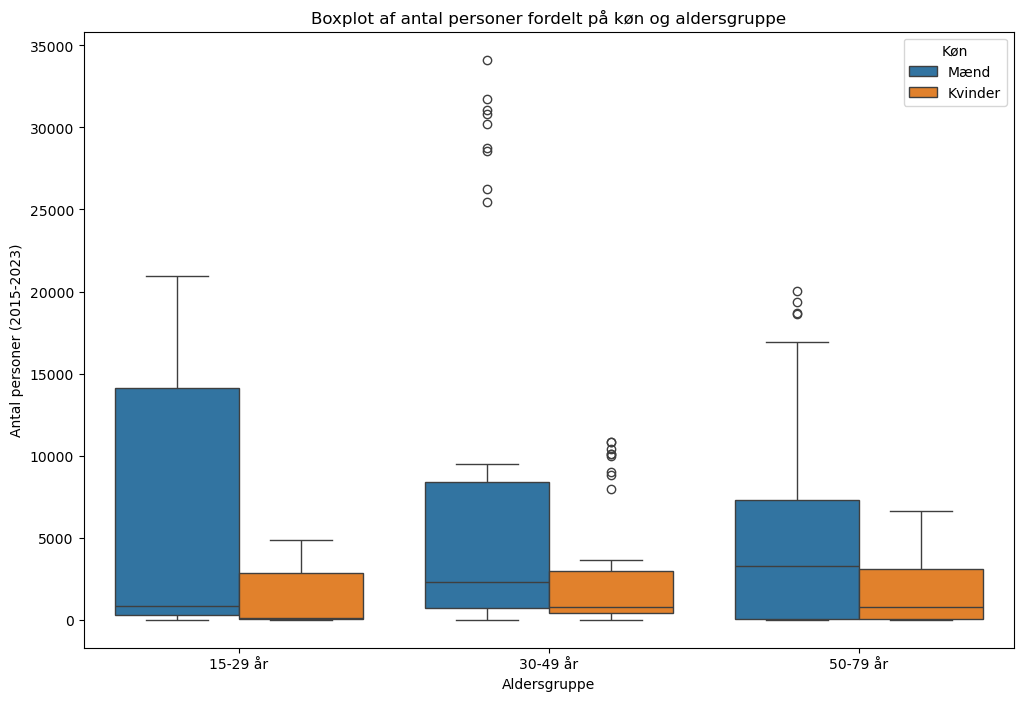

In [28]:
# box-wisker plot
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Remove both "Alder i alt" and "I alt"
df_plot = df1[
    (df1['Unnamed: 0'].isin(['Mænd','Kvinder'])) &                  
    (df1['Unnamed: 1'].isin(['15-29 år','30-49 år','50-79 år'])) &  
    (df1['Unnamed: 2'] != 'I alt')                                  
]

# Merge the dataset so that all years become one column
df_melted = df_plot.melt(
    id_vars=['Unnamed: 0','Unnamed: 1','Unnamed: 2'],
    value_vars=years,
    var_name='År',
    value_name='Antal personer'
)

plt.figure(figsize=(12,8))
sns.boxplot(
    data=df_melted,
    x='Unnamed: 1',   # aldersgruppe
    y='Antal personer',
    hue='Unnamed: 0'  # køn
)
plt.xlabel("Aldersgruppe")
plt.ylabel("Antal personer (2015-2023)")
plt.title("Boxplot af antal personer fordelt på køn og aldersgruppe")
plt.legend(title="Køn")
plt.show()

Grafen viser en sammenligning af antallet af personer (y-aksen) fordelt på alder (x-aksen: 15-29 år, 30-49 år, 50-79 år) og opdelt efter køn (blå for mænd, orange for kvinder). For hver aldersgruppe ses det at mænd generelt udgør et højere antal personer end kvinder, det betyder at mænd i gennemsnit udgør en større del af de skyldige i den aldersgruppe. Dette er ens på tværs af alle aldersgrupper.
En høj boks betyder at der er stor variation i antallet mellem de forskellige socioøkonomiske grupper samt at der er mange outliers. Dett betyder at nogle statusgrupper afviger meget i forhold til de øvrige (fx "Lønmodtagere" som ofte er mange flere end "Selvstændige").

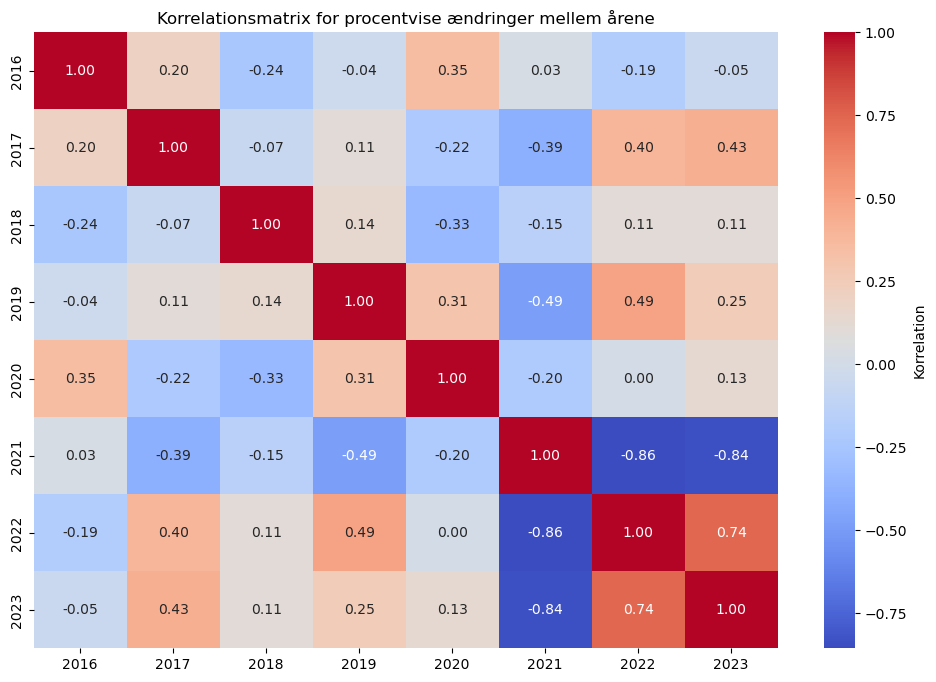

In [36]:
# Select only the numeric columns (years 2015–2023)
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Fill forward for NaN in category columns
df1['Unnamed: 0'] = df1['Unnamed: 0'].ffill()
df1['Unnamed: 1'] = df1['Unnamed: 1'].ffill()
df1['Unnamed: 2'] = df1['Unnamed: 2'].ffill()

# Filtrer kun numeriske kolonner (år)
df_num = df1[years]

# Filter only numeric columns (years)
df_pct_change = df_num.pct_change(axis=1, fill_method=None).iloc[:, 1:]

# Correlation of percentage changes
corr_matrix = df_pct_change.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Korrelation'})
plt.title("Korrelationsmatrix for procentvise ændringer mellem årene")
plt.show()

Heatmappet viser korrelationen mellem de procentvise ændringer i antal personer fra år til år, hvordan mønstrene i procentvise ændringer er mellem forskellige år. Høj korrelation mellem to år betyder at de fleste grupper ændrer sig på samme måde i de to år.
Fx hvis Mænd 15-29 voksede med 5% i 2016, vil Mænd 15-29 sandsynligvis have en lignende procentændring i 2017, hvis korrelationen er høj.

Konklusion: Efter at havde kigget dataen igennem og opsat flere grafer over den gældende data kan vi kluduere at der er en sammenhæng mellem skyldige personer og deres køn samt socioøkoknomisk status i tidsperioden 2015 til 2023. Ud fra dataen er den største gruppe lønmodtager mænd i alderen 30-49 år, her kan vi tyde at der er en sammenhæng mellem køn og socioøkoknomisk status.

Test og training af datasættet.

In [40]:
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023"]

# Fjern "I alt" og "Alder i alt" (ellers skaber de outliers)
df_plot = df1[
    (df1['Unnamed: 0'].isin(['Mænd','Kvinder'])) &
    (df1['Unnamed: 1'].isin(['15-29 år','30-49 år','50-79 år'])) &
    (df1['Unnamed: 2'] != 'I alt')
]

# Smelt datasættet (long format)
df_melted = df_plot.melt(
    id_vars=['Unnamed: 0','Unnamed: 1','Unnamed: 2'],
    value_vars=years,
    var_name='År',
    value_name='Antal personer'
)

# Fjern rækker hvor "Antal personer" mangler
df_melted = df_melted.dropna(subset=["Antal personer"])

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Features (X) og target (y)
X = df_melted[['År','Unnamed: 0','Unnamed: 1','Unnamed: 2']]
y = df_melted['Antal personer']

# One-hot encode kategoriske variabler
X = pd.get_dummies(X, drop_first=True)

# Train/test split (fx 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [42]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 13439790.653611666
R²: 0.6573462044076104


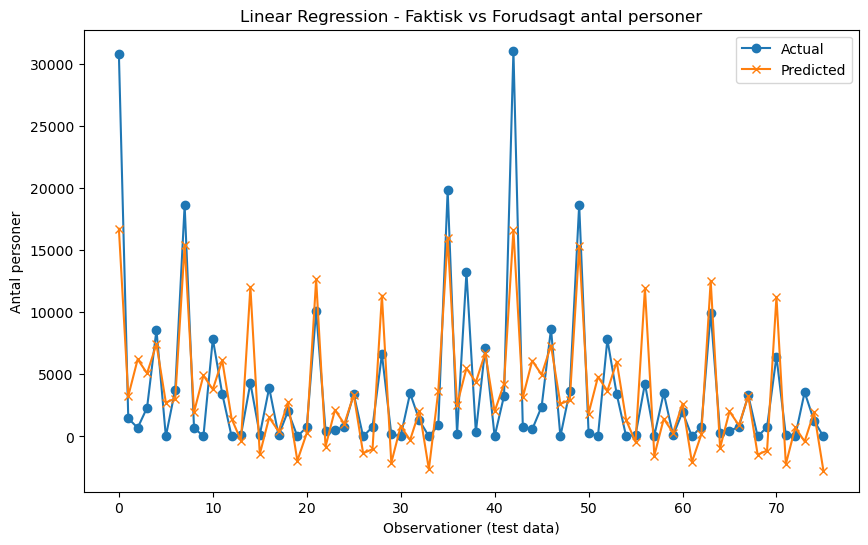

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", marker="o")
plt.plot(y_pred, label="Predicted", marker="x")
plt.title("Linear Regression - Faktisk vs Forudsagt antal personer")
plt.xlabel("Observationer (test data)")
plt.ylabel("Antal personer")
plt.legend()
plt.show()


In [45]:
# R-squared: the proportion of the variation in the dependent variable that is predictable from the independent variable(s)
from sklearn.metrics import r2_score
#r2_score(y, predict(X))
r2_score(y_test, y_pred)

0.6573462044076104

Vores model kan udregne med 65% sikkerhed, hvilket ikke er så meget. Her kan det enten være at vi skal justerer test mængden eller prøve igen med mere databearbejdning.